<H1>TITANIC: MACHINE LEARNING FROM DISASTER<H1>

Predicting the survival of the passengers using Machine Learning

In [1]:
# Import the libraries
import pandas as pd
import numpy as np

In [2]:
# import the datasets
train = pd.read_csv('train.csv')

In [3]:
# checking dataset info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Data Dictionary

Survived: 0 = No, 1 = Yes

pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

sibsp: # of siblings / spouses aboard the Titanic

parch: # of parents / children aboard the Titanic

ticket: Ticket number

cabin: Cabin number

embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
# check column type
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# check dataset desc
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h3> Exploratory Data Analysis (EDA)<h3>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# Get a count of the number of survivors 
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

C:\Users\novia\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Percentage of Survived Passengers')

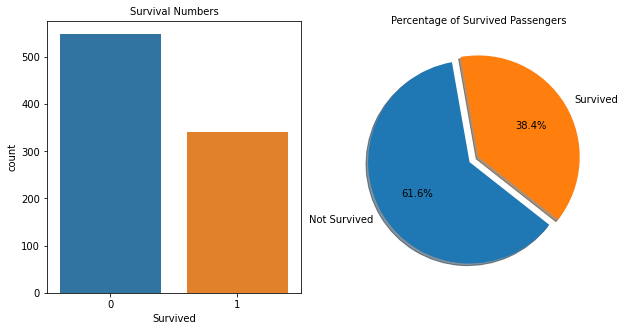

In [8]:
plt.figure(figsize=(10,5))

# Bar Number
plt.subplot(1,2,1)
sns.countplot(train['Survived'],label="Count")
plt.title('Survival Numbers', fontsize=10)

# Percentage
plt.subplot(1,2,2)
labels = ['Not Survived', 'Survived']
explode = (0.1,0)
plt.pie(train['Survived'].value_counts(normalize=True), labels=labels, explode=explode, autopct='%1.1f%%',shadow=True, startangle=100, textprops={"fontsize":10});
plt.title('Percentage of Survived Passengers', fontsize=10)

C:\Users\novia\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\novia\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\novia\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

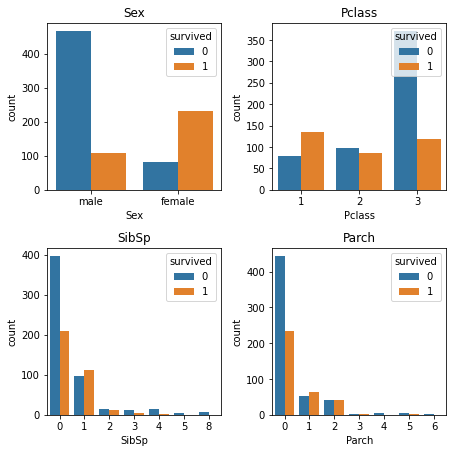

In [9]:
# Visualize the count of survivors for columns 'who', 'sex', 'pclass', 'sibsp', 'parch', and 'embarked'
cols = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked',]

n_rows = 2
n_cols = 2

# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(train[cols[i]], hue=train["Survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="survived", loc='upper right') 
        
plt.tight_layout();   #tight_layout

<AxesSubplot:title={'center':'Survival Distribution of Passengers Embarkation Port'}, xlabel='Survived', ylabel='count'>

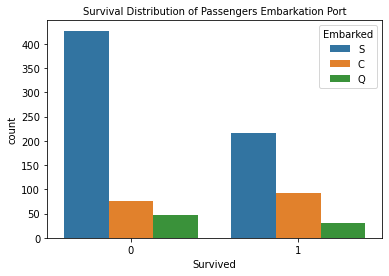

In [10]:
plt.title("Survival Distribution of Passengers Embarkation Port", fontsize=10)
sns.countplot(x="Survived", hue="Embarked", data=train)

<h3>Data Cleansing<h3>

Process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database adn refers to identifying incomplete, incorrect, or irrelevant part of the data and then replacing, modifying, or deleting the dirty or coarse data.

In [11]:
# checking NULL missing values
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# drop unnecessary column ("Cabin")
train.drop("Cabin", axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
# drop all the NULL values
train.dropna(inplace=True)

In [14]:
# checking NULL missing values again
print(train.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


no more missing values anymore

In [15]:
train.shape

(712, 11)

In [16]:
# Drop the unnecessary column for prediction
train.drop(["PassengerId","Name","Ticket"], axis=1, inplace=True)

<h3>Data Wrangling<h3>

Process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics.

data types need to be transformed/encoded to a number. It looks like column "Sex" and "Embarked" are the only two columns that has a non-number format and need to be transformed.

In [17]:
# Check the unique values for "Sex" and "Embarked" column
print(train['Sex'].unique())
print(train['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


Change the non-numeric data to numeric data, and print the new values.

In [18]:
from sklearn.preprocessing import LabelEncoder
train['Sex'] = LabelEncoder().fit_transform(train['Sex'].values)
train['Embarked'] = LabelEncoder().fit_transform(train['Embarked'].values)

In [19]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
6,0,1,1,54.0,0,0,51.8625,2
7,0,3,1,2.0,3,1,21.0750,2
8,1,3,0,27.0,0,2,11.1333,2
9,1,2,0,14.0,1,0,30.0708,0
10,1,3,0,4.0,1,1,16.7000,2


In [20]:
# Check the format after being transformed
print(train['Sex'].unique())
print(train['Embarked'].unique())

[1 0]
[2 0 1]


Split the data into independent ‘X’ and dependent ‘Y’ data sets.

In [21]:
# defining feature factor
x = train.drop("Survived", axis=1)
y = train["Survived"]

<h3>Feature Scaling<h3>

In [22]:
# Scale the data, meaning the data will be within a specific range
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)
print(X)

[[ 0.90859974  0.75613751 -0.52766856 ... -0.50678737 -0.51637992
   0.51958818]
 [-1.48298257 -1.32251077  0.57709388 ... -0.50678737  0.69404605
  -2.04948671]
 [ 0.90859974 -1.32251077 -0.25147795 ... -0.50678737 -0.50362035
   0.51958818]
 ...
 [-1.48298257 -1.32251077 -0.73481151 ... -0.50678737 -0.08633507
   0.51958818]
 [-1.48298257  0.75613751 -0.25147795 ... -0.50678737 -0.08633507
  -2.04948671]
 [ 0.90859974  0.75613751  0.16280796 ... -0.50678737 -0.50692839
  -0.76494927]]


Then split the data into 80% training (X_train and Y_train) and 20% testing (X_test and Y_test) data sets.

In [23]:
# Split data into train & test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

<h3>Implementing the Machine Learning Algorithm<h3>

In [24]:
#Create a function within many Machine Learning Models
def models(X_train,y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  logreg = LogisticRegression(random_state = 0)
  logreg.fit(X_train, y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_linear = SVC(kernel = 'linear', random_state = 0)
  svc_linear.fit(X_train, y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gaussian = GaussianNB()
  gaussian.fit(X_train, y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, y_train)
  
  #print model accuracy on the training data.
  print('[0] Logistic Regression Training Accuracy:', logreg.score(X_train, y_train))
  print('[1] K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))
  print('[2] Support Vector Machine (Linear Classifier) Training Accuracy:', svc_linear.score(X_train, y_train))
  print('[3] Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train))
  print('[4] Gaussian Naive Bayes Training Accuracy:', gaussian.score(X_train, y_train))
  print('[5] Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
  print('[6] Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
  
  return logreg, knn, svc_linear, svc_rbf, gaussian, tree, forest

In [25]:
model = models(X_train,y_train)

[0] Logistic Regression Training Accuracy: 0.7978910369068541
[1] K Nearest Neighbor Training Accuracy: 0.8629173989455184
[2] Support Vector Machine (Linear Classifier) Training Accuracy: 0.7768014059753954
[3] Support Vector Machine (RBF Classifier) Training Accuracy: 0.8488576449912126
[4] Gaussian Naive Bayes Training Accuracy: 0.8031634446397188
[5] Decision Tree Classifier Training Accuracy: 0.9929701230228472
[6] Random Forest Classifier Training Accuracy: 0.9753954305799648


The model that was most accurate on the training data was the Decision Tree Classifier with an accuracy of 99.29%

In [26]:
# Show the confusion matrix and accuracy for all the models on the test data.
from sklearn.metrics import confusion_matrix 
for i in range(len(model)):
   cm = confusion_matrix(y_test, model[i].predict(X_test)) 
   
   #extracting TN, FP, FN, TP
   TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(X_test)).ravel()
   
   print(cm)
   print('Model [{}] Testing Accuracy = {}'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
   print()

[[73  9]
 [18 43]]
Model [0] Testing Accuracy = 0.8111888111888111

[[71 11]
 [20 41]]
Model [1] Testing Accuracy = 0.7832167832167832

[[70 12]
 [18 43]]
Model [2] Testing Accuracy = 0.7902097902097902

[[75  7]
 [22 39]]
Model [3] Testing Accuracy = 0.7972027972027972

[[69 13]
 [23 38]]
Model [4] Testing Accuracy = 0.7482517482517482

[[60 22]
 [10 51]]
Model [5] Testing Accuracy = 0.7762237762237763

[[67 15]
 [14 47]]
Model [6] Testing Accuracy = 0.7972027972027972



The model that was most accurate on the test data is the model at position 0, which is the Logistic Regression Model with an accuracy of 81.11%.

After finishing the training and testing, now let's try the prediction for the passengers survival

In [27]:
#Print Prediction of model
pred = model[5].predict(X_test)
print(pred)

#Print a space
print()

#Print the actual values
for a in y_test:
    print(a, end=' ')

[1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1
 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1
 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1]

0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 

try a survival prediction with attribute [['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

pclass: 1=First ; 2=Second ; 3=Third

sex: 1=male ; 0=female

age: your age number

sibsp: number of siblings/spouses

parch: number of parents/children

fare: your ticket fare

embarked: 0=Cherbourg ; 1=Queenstown ; 2=Southampton

In [29]:
predict_the_survival = [[1,1,23,0,0,100,2]]
# Print Prediction 
# Decision Tree model
pred = model[5].predict(predict_the_survival)
print(pred)

if pred == 0:
  print('You did not survived')
else:
  print('You survived')

[0]
You did not survived
